<a href="https://colab.research.google.com/github/AlenaAntipina/PytorchLearning/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch 
import torchvision
from torchvision import transforms

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
transform = transforms.Compose([transforms.ToTensor()])

trainset = torchvision.datasets.MNIST(root='./data', train = True, 
                                      download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, 
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train = False, 
                                      download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=4, 
                                          shuffle=False, num_workers=2)

classes = tuple(str(i) for i in range(10))

In [ ]:
trainloader.dataset.train_data.shape

torch.Size([60000, 28, 28])

In [ ]:
testloader.dataset.test_data.shape

torch.Size([10000, 28, 28])

In [ ]:
trainloader.dataset.train_data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [ ]:
# преобразуем тензор в np.array
numpy_img = trainloader.dataset.train_data[0].numpy()

In [ ]:
numpy_img.shape

(28, 28)

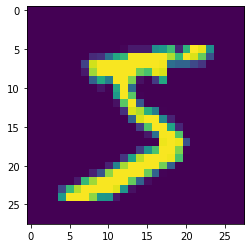

In [ ]:
plt.imshow(numpy_img)

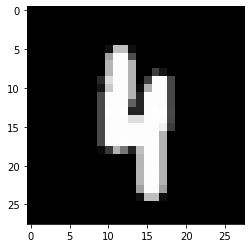

In [ ]:
i = np.random.randint(low=0, high=60000)
plt.imshow(trainloader.dataset.train_data[i].numpy(), cmap='gray')

In [ ]:
next(iter(trainloader))[0].shape

torch.Size([4, 1, 28, 28])

In [ ]:
for data in trainloader:
  print(data)
  break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
   

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class SimpleConvNet(nn.Module):
  def __init__(self):
    super(SimpleConvNet, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
    self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
    self.fc1 = nn.Linear(4 * 4 * 16, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    # print(x.shape)
    x = x.view(-1, 4 * 4 * 16)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

In [ ]:
net = SimpleConvNet()

batch = []

for x in trainloader:
  batch = x
  break

net.forward(torch.FloatTensor(batch[0]))

torch.Size([4, 16, 4, 4])


tensor([[-0.0006, -0.0384,  0.0835, -0.0290,  0.0441, -0.0758, -0.1074, -0.0822,
         -0.0726, -0.0928],
        [ 0.0002, -0.0462,  0.0722, -0.0303,  0.0611, -0.0717, -0.0917, -0.0724,
         -0.0765, -0.0806],
        [-0.0017, -0.0301,  0.0793, -0.0314,  0.0567, -0.0780, -0.1040, -0.0857,
         -0.0611, -0.0895],
        [ 0.0062, -0.0414,  0.0800, -0.0350,  0.0579, -0.0713, -0.0977, -0.0791,
         -0.0775, -0.0863]], grad_fn=<AddmmBackward0>)

In [ ]:
from tqdm import tqdm_notebook

In [ ]:
net = SimpleConvNet()

In [ ]:
loss_fn = torch.nn.CrossEntropyLoss()

learning_rate = 1e-4
optimizer = torch.optim.Adam(net.parameters(), lr = learning_rate)
losses = []

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


  0%|          | 0/2 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


  0%|          | 0/15000 [00:00<?, ?it/s]

[1,  2000] loss: 1.111
[1,  4000] loss: 0.403
[1,  6000] loss: 0.300
[1,  8000] loss: 0.268
[1, 10000] loss: 0.207
[1, 12000] loss: 0.191
[1, 14000] loss: 0.184


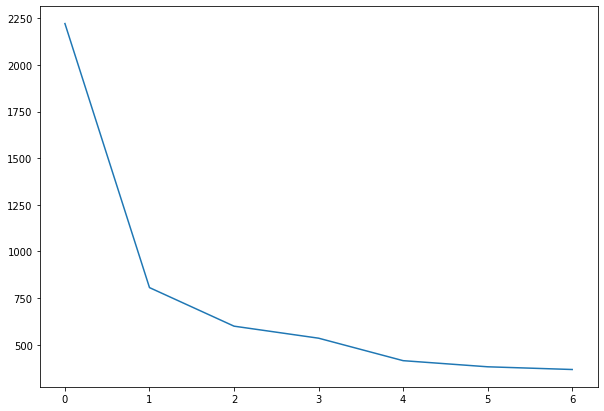

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


  0%|          | 0/15000 [00:00<?, ?it/s]

[2,  2000] loss: 0.142
[2,  4000] loss: 0.150
[2,  6000] loss: 0.129
[2,  8000] loss: 0.120
[2, 10000] loss: 0.113
[2, 12000] loss: 0.097
[2, 14000] loss: 0.102


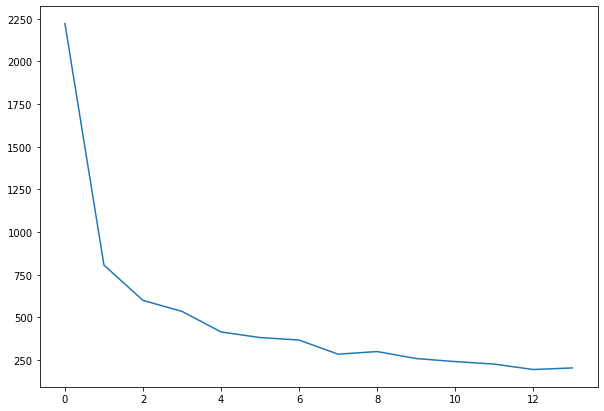

Training is finished


In [ ]:
for epoch in tqdm_notebook(range(2)):
  running_loss = 0.0
  for i, batch in enumerate(tqdm_notebook(trainloader)):
    x_batch, y_batch = batch

    optimizer.zero_grad()

    y_pred = net(x_batch)
    loss = loss_fn(y_pred, y_batch)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    if i % 2000 == 1999:
      print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
      losses.append(running_loss)
      running_loss = 0.0

  plt.figure(figsize=(10,7))
  plt.plot(np.arange(len(losses)), losses)
  plt.show()

print('Training is finished')



In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
  for data in testloader:
    images, labels = data
    y_pred = net(images)
    _, predicted = torch.max(y_pred, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
      label = labels[i]
      class_correct[label] += c[i].item()
      class_total[label] += 1

for i in range(10):
  print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of     0 : 99 %
Accuracy of     1 : 99 %
Accuracy of     2 : 98 %
Accuracy of     3 : 99 %
Accuracy of     4 : 98 %
Accuracy of     5 : 96 %
Accuracy of     6 : 98 %
Accuracy of     7 : 98 %
Accuracy of     8 : 97 %
Accuracy of     9 : 98 %
